In [2]:
#Theme classification with Zero Shot Classification

#The goal is to be able to input some themes and it will tell you how much each them is occuring on the TV Show using the transcript

In [3]:
#Zero Shot Classifier 

#You can imput every them which is a special type of classification
#For example you give a premises and hypotesis and it will give three classes, entailment, neutral and contradiction

In [4]:
from transformers import pipeline
from nltk import sent_tokenize
import nltk 
import torch
import csv
import pandas as pd
import numpy as np



In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load the Model

In [6]:
model_name = "facebook/bart-large-mnli"
device = 0 if torch.cuda.is_available() else 'cpu'

In [7]:
def load_model(device):
    theme_classifier = pipeline("zero-shot-classification", model = model_name, device=device) #Leaving global variable for model name because we are going to use a class
    return theme_classifier

In [8]:
theme_classifier = load_model(device)

C:\Users\a\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [9]:
theme_list=["love", "anger", "fear", "gridiness", "generosity", "jealousy", "envy", "kindness", "cruelty", "hope", "distrust", "loyalty", "betrayal", "friendship", "hate", "forgiveness", "revenge", "justice", "injustice"]

In [10]:
theme_classifier(theme_list, " I hate you !!", multi_label=True)

[{'sequence': 'love',
  'labels': ['I hate you !!'],
  'scores': [9.677460911916569e-05]},
 {'sequence': 'anger',
  'labels': ['I hate you !!'],
  'scores': [0.4929245710372925]},
 {'sequence': 'fear',
  'labels': ['I hate you !!'],
  'scores': [0.11976277828216553]},
 {'sequence': 'gridiness',
  'labels': ['I hate you !!'],
  'scores': [0.09538835287094116]},
 {'sequence': 'generosity',
  'labels': ['I hate you !!'],
  'scores': [4.981039455742575e-05]},
 {'sequence': 'jealousy',
  'labels': ['I hate you !!'],
  'scores': [0.04291082173585892]},
 {'sequence': 'envy',
  'labels': ['I hate you !!'],
  'scores': [0.13140051066875458]},
 {'sequence': 'kindness',
  'labels': ['I hate you !!'],
  'scores': [4.624186476576142e-05]},
 {'sequence': 'cruelty',
  'labels': ['I hate you !!'],
  'scores': [0.33941856026649475]},
 {'sequence': 'hope',
  'labels': ['I hate you !!'],
  'scores': [7.615565846208483e-05]},
 {'sequence': 'distrust',
  'labels': ['I hate you !!'],
  'scores': [0.39458024

# Load the Data Set 


In [11]:
#File path 

file_path = "C:/Users/a/Desktop/Programmation/TV Series Analysis Project/Data/transcripts.csv"

#Read the file

df = pd.read_csv(file_path)

df.head()

#Get rid of the the 1st column

df = df.drop(df.columns[0], axis=1)

# Convert all entries to strings and replace NaN with an empty string
df = df.fillna("").astype(str)

#Divide the transcript into 10 scripts of equal length 

total_lines = len(df)
lines_per_script = total_lines // 10

# Initialize lists to store the script numbers and concatenated scripts
script_numbers = []
scripts = []

# Loop through the DataFrame and create the scripts
for i in range(10):
    start_index = i * lines_per_script
    end_index = (i + 1) * lines_per_script if i < 9 else total_lines
    script = "\n".join(df.iloc[start_index:end_index, 0].tolist())
    script_numbers.append(i + 1)
    scripts.append(script)

# Create the new DataFrame
new_df = pd.DataFrame({
    "part": script_numbers,
    "script": scripts
})

# Display the new DataFrame
print(new_df)



   part                                             script
0     1  Where am I? Where the fuck am I?\nLogan? It’s ...
1     2  We need to know what’s happening. There are hu...
2     3  What about Dad??\nYeah, your dad. Hence the de...
3     4  Fuck you!\nYeah?\nFuck you.\nYeah?\nFuck you!\...
4     5  No, sir … That’s actually anti-racist and also...
5     6  Are you alright? I hardly touched him, it’s th...
6     7  Yeah well, sorry for missing you. What – the f...
7     8  Oh, Dad? That’s— It’s insulting.\nAlright. Ger...
8     9  Uh-huh?\nNo?\nI just think, maybe, Church and ...
9    10  Yes. So. Thank you for your time.\nYou don’t w...


# Run the model 

In [12]:
script = new_df.iloc[0]["script"]


In [13]:
script_sentences = sent_tokenize(script)
script_sentences[:3]

['Where am I?', 'Where the fuck am I?', 'Logan?']

In [14]:
#Batch Sentence
sentence_batch_size=20 
script_batches=[]
for index in range(0, len(script_sentences), sentence_batch_size):
    sent=" ".join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)


In [15]:
script_batches[:2]

['Where am I? Where the fuck am I? Logan? It’s okay, Logan. Ugh. Okay. Okay. It’s okay. Where am I? It’s okay. We’re in the new place. It’s okay, Logan. Waystar Royco is a family. A family that spans four continents, fifty countries, three divisions: Entertainment, News and Resorts. Working together. To provide a net that can hold the world, or catapult it forward. To the next adventure! USA Today The Correspondent— Chicago Daily—\nJoining Waystar Royco you’re joining one of the most dynamic news and entertainment companies in the world. Feel it! ™\nHow we feeling.',
 'Ready to go? Okay? You in the room? Uh-huh. Yep. And who are you playing today? I’m not playing anyone. I   Doderick. And Doderick is? Doderick is mild-mannered to a fault. Puppyish in my enthusiasms. Playful, eager and lacking in guile. I am the best friend to all I meet. Okay. Let’s go, folks! Brooklyn, Bronx, Queens and Staten From the Battery to the tip of Manhattan Asian, Middle Eastern and Latin, Black, White, New 

In [16]:
theme_ouptut = theme_classifier(script_batches[:2],theme_list, multi_label=True)

theme_ouptut

[{'sequence': 'Where am I? Where the fuck am I? Logan? It’s okay, Logan. Ugh. Okay. Okay. It’s okay. Where am I? It’s okay. We’re in the new place. It’s okay, Logan. Waystar Royco is a family. A family that spans four continents, fifty countries, three divisions: Entertainment, News and Resorts. Working together. To provide a net that can hold the world, or catapult it forward. To the next adventure! USA Today The Correspondent— Chicago Daily—\nJoining Waystar Royco you’re joining one of the most dynamic news and entertainment companies in the world. Feel it! ™\nHow we feeling.',
  'labels': ['distrust',
   'loyalty',
   'kindness',
   'generosity',
   'fear',
   'gridiness',
   'friendship',
   'hope',
   'anger',
   'justice',
   'love',
   'forgiveness',
   'envy',
   'cruelty',
   'injustice',
   'jealousy',
   'betrayal',
   'revenge',
   'hate'],
  'scores': [0.7736278176307678,
   0.7527668476104736,
   0.6620371341705322,
   0.6555688381195068,
   0.638863742351532,
   0.624227

In [17]:
#Wrangle the output 
#We want all scores for the same theme to be in the same row
themes={}
for output in theme_ouptut:
    for label,score in zip(output["labels"], output["scores"]):
        if label not in themes:
            themes[label]=[]
        themes[label].append(score)


In [18]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    sentence_batch_size = 20
    script_batches = []
    for index in range(0, len(script_sentences), sentence_batch_size):
        sent = " ".join(script_sentences[index:index + sentence_batch_size])
        script_batches.append(sent)

    #Run the model 
    theme_output = theme_classifier(script_batches[:2], theme_list, multi_label=True)

    #Wrangle the output
    themes = {}
    for output in theme_output:
        for label, score in zip(output["labels"], output["scores"]):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)

    #Get the mean of the scores        
    themes = {k: np.mean(np.array(v)) for k, v in themes.items()}

    return themes

In [19]:
new_df= new_df.head(2) 
new_df

,part,script
0,1,Where am I? Where the fuck am I?\nLogan? It’s ...
1,2,We need to know what’s happening. There are hu...


In [20]:
output_themes = new_df["script"].apply(get_themes_inference)

In [21]:
output_themes

0    {'distrust': 0.4238778054714203, 'loyalty': 0....
1    {'distrust': 0.8479702472686768, 'loyalty': 0....
Name: script, dtype: object

In [22]:
theme_df = pd.DataFrame(output_themes.tolist())

In [23]:
new_df[theme_df.columns] = theme_df
new_df

,part,script,distrust,loyalty,kindness,generosity,fear,gridiness,friendship,hope,...,justice,love,forgiveness,envy,cruelty,injustice,jealousy,betrayal,revenge,hate
0,1,Where am I? Where the fuck am I?\nLogan? It’s ...,0.423878,0.775339,0.805297,0.743258,0.325727,0.403692,0.740154,0.520717,...,0.321059,0.283385,0.215395,0.127959,0.079526,0.074552,0.077599,0.063908,0.041210,0.023957
1,2,We need to know what’s happening. There are hu...,0.847970,0.654444,0.173407,0.194231,0.740756,0.474819,0.077456,0.194431,...,0.304578,0.036874,0.010659,0.128341,0.470585,0.708314,0.124713,0.704727,0.052247,0.090193


# Visualize the outputs

In [26]:
theme_output=new_df.drop(["part"], axis=1).sum().reset_index()
theme_output.columns=["theme", "score"]

In [27]:
theme_output


,theme,score
0,distrust,1.271848
1,loyalty,1.429783
2,kindness,0.978703
3,generosity,0.937489
4,fear,1.066483
5,gridiness,0.878511
6,friendship,0.817611
7,hope,0.715148
8,anger,0.742274
9,justice,0.625637


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


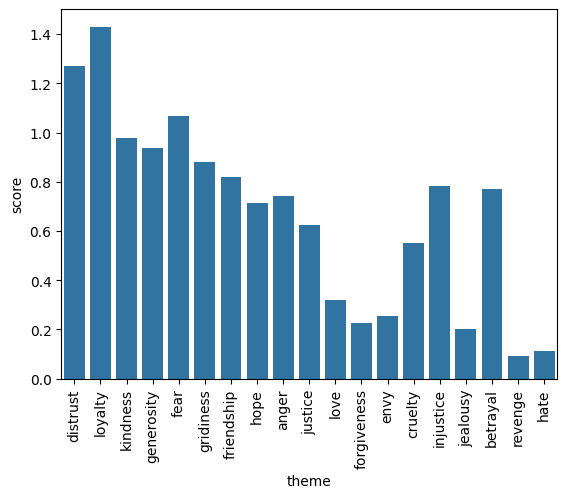

In [32]:
sns.barplot(data=theme_output, x="theme", y="score" )
plt.xticks(rotation=90)

plt.show()
